In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import matplotlib.ticker as ticker
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
FONT_SIZE = 25
LW=4
plt.rcParams.update({
    "lines.markersize": 13,
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,     
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE, 
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})
plt.rc('hatch', color='white', linewidth=LW)

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
ALL_MAT_COLOR = sns.color_palette()[1]
HELIX_COLOR = sns.color_palette()[2]
ALL_COMPUTE_COLOR = sns.color_palette()[3]
BOTTOMUP_COLOR = sns.color_palette()[4]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results'

output_directory = WRITE_DIRECTORY_ROOT + '/kaggle_home_credit/reuse_benchmarking'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
def savefig(filename):
    plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')

In [2]:
result_folder = ROOT_RESULT_FOLDER + '/remote/reuse_benchmarking/kaggle_home_credit'
# IN PAPER = result_folder + '/cloud-41/2019-10-19/09-49.csv'
result_file = result_folder + '/cloud-41/2020-02-14/23-47.csv'

In [3]:
HEADERS = [
   'exp_id', 'n', 'workload_size','LN', 'HL'
]

reuse_result = pd.read_csv(result_file, header=None, names=HEADERS)
# reuse_result['workload_order'] = reuse_result['workload'].replace(execution_order)
# reuse_result['reuse_type'] = reuse_result['reuse_type'].replace(reuse_map)
# reuse_result = reuse_result[reuse_result.reuse_type != 'BU']
# reuse_result['cumulative_run_time'] = reuse_result.groupby(['exp_id', 'reuse_type'])['run_time'].apply(lambda x: x.cumsum())

In [4]:
reuse_df = pd.melt(reuse_result, id_vars=['exp_id','workload_size', 'n'], var_name ='type',value_name='run_time', value_vars=['LN','HL'])

reuse_df['cumulative_run_time'] = reuse_df.groupby(['exp_id', 'type'])['run_time'].apply(lambda x: x.cumsum())

                   

In [5]:
reuse_result[reuse_result.n == 1]

,exp_id,n,workload_size,LN,HL
0,3B4FFB0F,1,1227,0.002124,0.014388
10000,F43317CD,1,1227,0.001134,0.005495
20000,B46EEFDC,1,1227,0.001454,0.007471


In [10]:
def plot_reuse_overhead(df):
    plt.figure(figsize=(8, 4))
    plot = sns.lineplot(
        data=df,
        estimator='mean',
        x='n',
        y='cumulative_run_time',
        hue='type',
        style='type',
        lw=LW,
        ci='sd',
        hue_order=['LN', 'HL'],
        dashes={
            'LN': (1, 0),
            'HL': (2, 2),
        },
        palette={
            'LN': SYSTEM_COLOR,
            'HL':HELIX_COLOR,
        },
        legend='brief')

    plot.set_xlabel('Workload Size')
    plot.set_ylabel('Reuse Overhead (s)')
    #plot.set_ylim((0, 2200))
    #plot.set_yticks([0, 500, 1000, 1500, 2000])
    #plot.set_xticks(range(1,9))
    #plot.set_xticklabels(range(1,9))
    #plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    #plot.get_legend().remove()
   # ax.tick_params(axis='both', which='major', pad=-2)
    lg = plt.legend(
        loc='upper center',
        handlelength=1.5,
        handletextpad=0.1,
        #fontsize=17,
        ncol=3,
        columnspacing=0.5,
        bbox_to_anchor=(0.55, 1.2))
    handles = lg.legendHandles
    labels = ['CO','HL']
    del handles[0]
    from matplotlib.lines import Line2D
    handles[0] = Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        lw=5,
                        dashes=(1, 0))
    
    handles[1] = Line2D([0], [1],
                        color=HELIX_COLOR,
                        lw=5,
                        dashes=(2, 2))
    plt.xscale('log')
    #plot.set_xticks([1,250,500,1000])
    #plot.xaxis.set_major_locator(ticker.MultipleLocator(100))
    print(plt.xticks()[0])
    legend = plt.legend(
        handles,
        labels,
        frameon=True,
        loc='upper center',
        handlelength=2,
        handletextpad=0.1,
        #fontsize=TICK_LABEL_SIZE,
        numpoints=1,
        ncol=1,
        columnspacing=0.5,
        bbox_to_anchor=(.15, 1.1))
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)
    
    return plot

[  1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06]


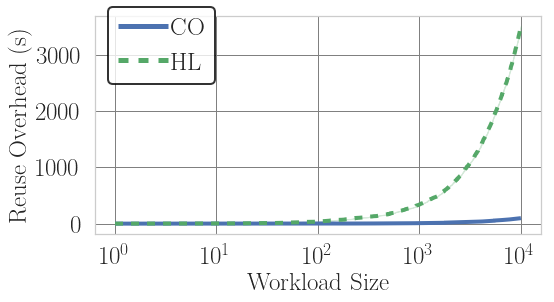

In [11]:
plot_reuse_overhead(reuse_df[reuse_df.type != 'GENERATION'])

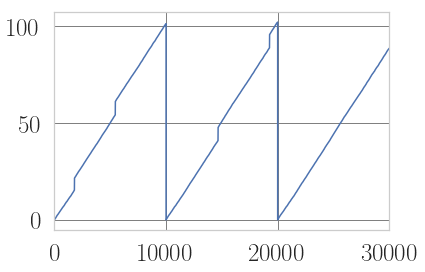

In [12]:
reuse_df[reuse_df.type == 'LN']['cumulative_run_time'].plot()

In [13]:
reuse_df[reuse_df.type == 'HL'].tail()

,exp_id,workload_size,n,type,run_time,cumulative_run_time
59995,B46EEFDC,1485,9996,HL,0.235435,3510.839592
59996,B46EEFDC,1171,9997,HL,0.959287,3511.798879
59997,B46EEFDC,1592,9998,HL,0.048953,3511.847832
59998,B46EEFDC,1543,9999,HL,0.133804,3511.981636
59999,B46EEFDC,1388,10000,HL,0.031232,3512.012868


In [14]:
reuse_df[reuse_df.type == 'LN'].tail()

,exp_id,workload_size,n,type,run_time,cumulative_run_time
29995,B46EEFDC,1485,9996,LN,0.009956,88.491326
29996,B46EEFDC,1171,9997,LN,0.021775,88.513101
29997,B46EEFDC,1592,9998,LN,0.004085,88.517186
29998,B46EEFDC,1543,9999,LN,0.006852,88.524038
29999,B46EEFDC,1388,10000,LN,0.003520,88.527558


In [29]:
reuse_df[reuse_df.type == 'GENERATION'].tail()

,exp_id,workload_size,n,type,run_time,cumulative_run_time
8995,0E3A9230,2737,996,GENERATION,0.329632,476.188594
8996,0E3A9230,2737,997,GENERATION,0.326087,476.514681
8997,0E3A9230,2737,998,GENERATION,0.329049,476.843730
8998,0E3A9230,2737,999,GENERATION,0.323558,477.167288
8999,0E3A9230,2737,1000,GENERATION,0.324873,477.492161


In [33]:
reuse_result

,exp_id,n,workload_size,GENERATION,LN,HL
0,83564879,1,819,0.077601,0.001873,0.009171
1,83564879,2,855,0.078447,0.007172,0.092423
2,83564879,3,799,0.071635,0.004410,0.031471
3,83564879,4,516,0.048171,0.001903,0.010842
4,83564879,5,907,0.073896,0.056659,5.509508
5,83564879,6,906,0.097478,0.003245,0.028809
6,83564879,7,877,0.081655,0.036378,1.654483
7,83564879,8,660,0.058509,0.014687,0.352906
8,83564879,9,512,0.047325,0.036422,1.776454
9,83564879,10,807,0.087638,0.004855,0.020543
